In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Cargar el csv
df_accidentes = pd.read_csv("accidentes_2.csv")

In [3]:
df_accidentes.head()

,id,fecha,franja_hora,gravedad,sexo,edad,vehiculo_1,vehiculo_2,direccion_normalizada,tipo_calle,comuna,latitud,longitud
0,2016-0001,2016-01-01,4,FATAL,M,19,MOTO,AUTOMOVIL,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",AVENIDA,8,-34.68757022,-58.47533969
1,2016-0002,2016-01-02,1,FATAL,M,70,AUTOMOVIL,TRANSPORTE PUBLICO,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",GRAL PAZ,9,-34.66977709,-58.50877521
2,2016-0003,2016-01-03,7,FATAL,M,30,MOTO,AUTOMOVIL,ENTRE RIOS AV. 2034,AVENIDA,1,-34.63189362,-58.39040293
3,2016-0004,2016-01-10,0,LEVE - SIN LESIONES,M,18,MOTO,SD,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",AVENIDA,8,-34.68092974,-58.46503904
4,2016-0005,2016-01-21,5,FATAL,M,29,MOTO,TRANSPORTE PUBLICO,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",AVENIDA,1,-34.62246630,-58.38718297


### Comienzo con la revisión de las variables de forma independiente para luego analizar en conjunto:

#### Distribución Horaria

In [4]:
franja_hora = df_accidentes["franja_hora"].value_counts()

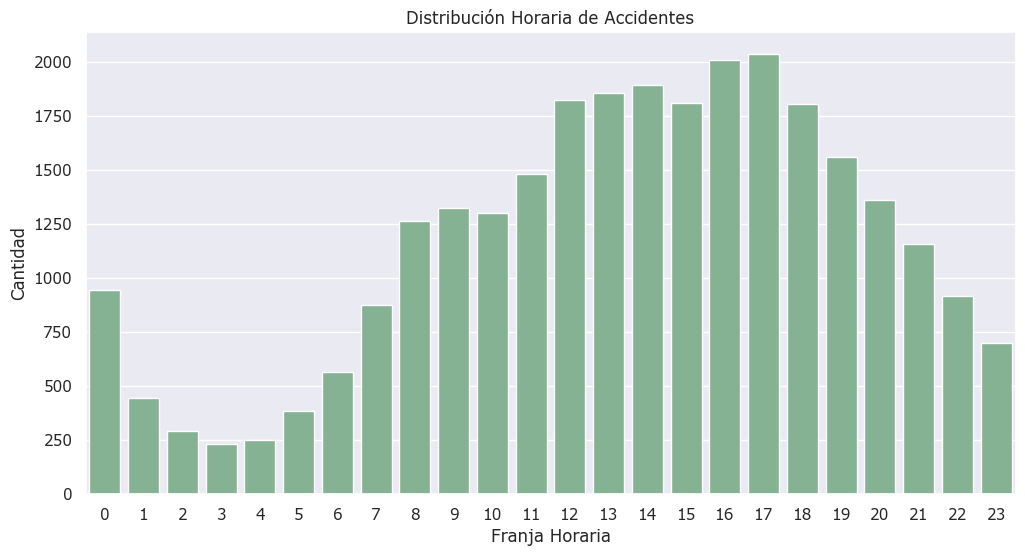

In [11]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='crest',font="Verdana",font_scale=1)
sns.barplot(x=franja_hora.index, y=franja_hora)
plt.title('Distribución Horaria de Accidentes')
plt.xlabel('Franja Horaria')
plt.ylabel("Cantidad")
plt.show()

Se observa un aumento paulatino de los accidentes en las horas diurnas, con un pico entre las 16 y las 17 horas, que coincide con en fin de la jornada laboral. Durante la noche el número de accidentes va disminuyendo, alcanzando los valores mínimos entre la 1 y las 5 de la madrugada.

#### Gravedad

In [13]:
gravedad = df_accidentes["gravedad"].value_counts()

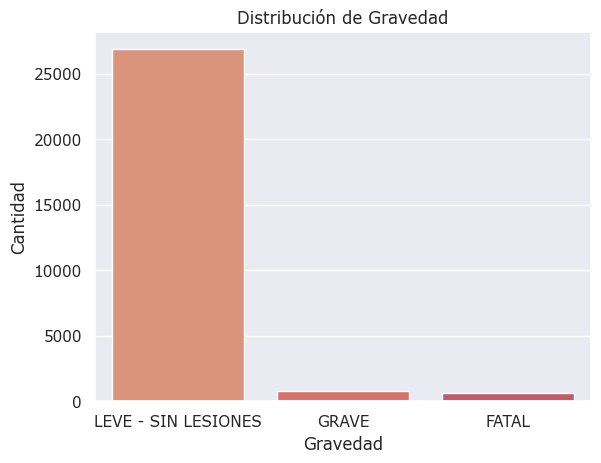

In [15]:
sns.set_theme(style="darkgrid",palette='flare',font="Verdana",font_scale=1)
sns.barplot(x=gravedad.index, y=gravedad, hue=gravedad.index)
plt.title('Distribución de Gravedad')
plt.xlabel('Gravedad')
plt.ylabel("Cantidad")
plt.show()

Lógicamente, la cantidad de accidentes con heridas leves o sin lesiones es muy superior a la de graves o con fallecidos. Incluso siendo que el dataset de casos fatales abarca un período de tiempo dos veces mayor.

#### Sexo

In [16]:
total = df_accidentes.__len__()
hombres = df_accidentes["sexo"].value_counts()[0]
mujeres = df_accidentes["sexo"].value_counts()[1]
print(hombres*100/total)
print(mujeres*100/total)

68.85749602684089
31.1425039731591


C:\Users\Usuario\AppData\Local\Temp\ipykernel_9864\2012252851.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hombres = df_accidentes["sexo"].value_counts()[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9864\2012252851.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mujeres = df_accidentes["sexo"].value_counts()[1]


In [19]:
genero = df_accidentes["sexo"].value_counts()

<Figure size 600x600 with 0 Axes>

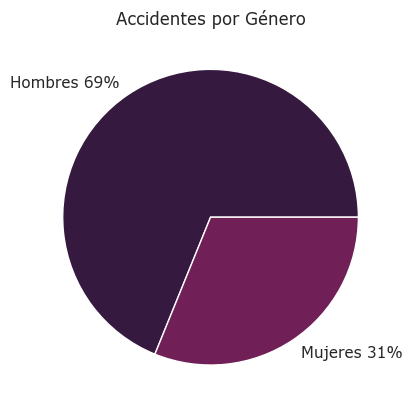

In [20]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(genero, labels=["Hombres 69%", "Mujeres 31%"])
plt.title('Accidentes por Género')
plt.show()

Este gráfico solo permite una interpretación literal, sobre que hay más accidentados hombres que mujeres.

#### Edad

In [21]:
edad = df_accidentes["edad"].value_counts()

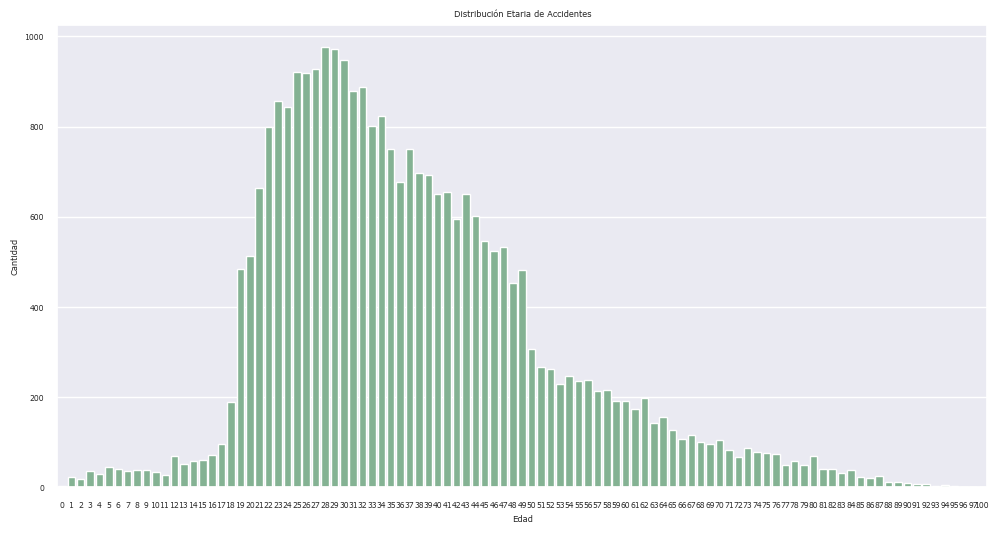

In [27]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='crest',font="Verdana",font_scale=0.5)
sns.barplot(x=edad.index, y=edad)
plt.title('Distribución Etaria de Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

#### Me parece más adecuado trabajar las edades por rango etario.

In [47]:
# Definir los límites de los grupos de edades
edades_minimas = [0, 11, 17, 22, 26, 31, 36, 41, 46, 51, 61, 71]
edades_maximas = [10, 16, 21, 25, 30, 35, 40, 45, 50, 60, 70, 100]

# Crear una función para asignar el rango etario según la edad
def asignar_rango_etario(edad):
    for i in range(len(edades_minimas)):
        if edades_minimas[i] <= edad <= edades_maximas[i]:
            return f"{edades_minimas[i]}-{edades_maximas[i]}"

In [48]:
# Aplicar la función a la columna 'edad' para crear la columna 'rango_etario'
df_accidentes['rango_etario'] = df_accidentes['edad'].apply(asignar_rango_etario)

df_accidentes[['edad', 'rango_etario']].head(10)

,edad,rango_etario
0,19,17-21
1,70,61-70
2,30,26-30
3,18,17-21
4,29,26-30
5,30,26-30
6,29,26-30
7,18,17-21
8,22,22-25
9,16,11-16


In [49]:
rango = df_accidentes["rango_etario"].value_counts()
rango.sort_index(inplace=True)

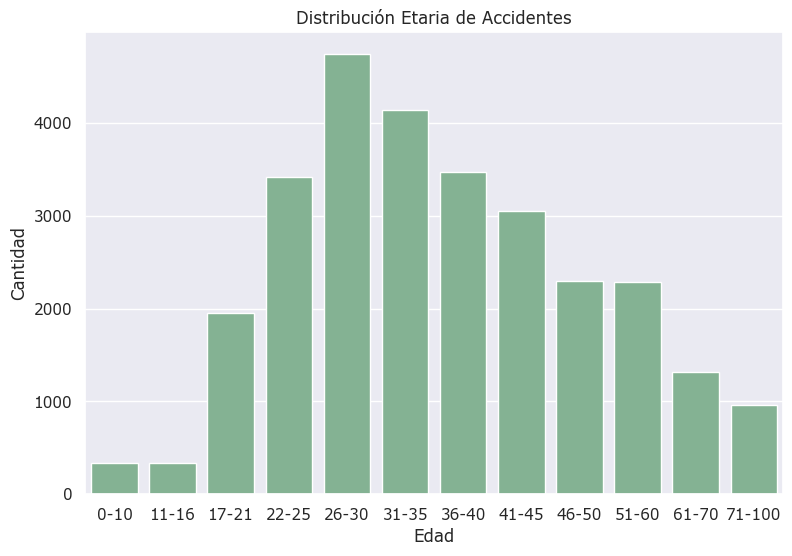

In [50]:
plt.figure(figsize=(9,6))
sns.set_theme(style="darkgrid",palette='crest',font="Verdana",font_scale=1)
sns.barplot(x=rango.index, y=rango)
plt.title('Distribución Etaria de Accidentes')
plt.xlabel('Edad')
plt.ylabel("Cantidad")
plt.show()

Se observa a partir de la interpretación de ambos gráficos, que el pico de accidentes se da en torno a los 30 años. De todos modos, al igual que para las otras variables, sin saber la distribución de los conductores totales no se puede inferir que a esa edad se den más accidentes, ya que seguramente coincide con la edad en la que hay más conductores. De todos modos puede ser una etaria sobre la cual focalizar cualquier tipo de campaña.

In [51]:
# Guardar el csv con el rango etario
df_accidentes.to_csv("accidentes_2.csv", index=False)

#### Vehículos

In [61]:
vehiculo_1 = df_accidentes["vehiculo_1"][df_accidentes["vehiculo_1"] != "SD"].value_counts()
vehiculo_2 = df_accidentes["vehiculo_2"][df_accidentes["vehiculo_2"] != "SD"].value_counts()

<Figure size 600x600 with 0 Axes>

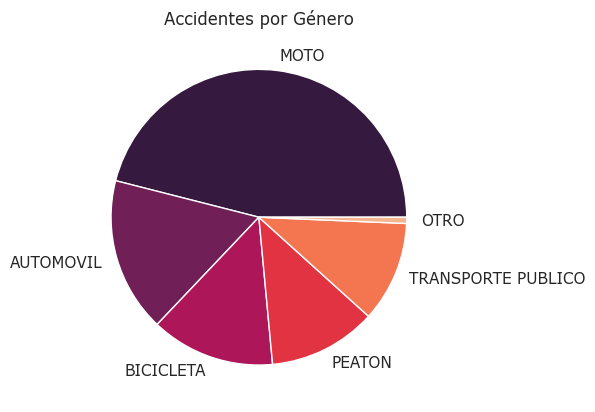

In [64]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='rocket',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(vehiculo_1, labels=vehiculo_1.keys())
plt.title('Accidentes por Género')
plt.show()

De este gráfico se observa que en casi el 50% de los accidentes hay una moto implicada. Por lo que acá hay un segmento sobre el cual hacer foco.

#### Tipo de Calle

In [63]:
tipo_via = df_accidentes["tipo_calle"][df_accidentes["tipo_calle"] != "SD"].value_counts()

<Figure size 600x600 with 0 Axes>

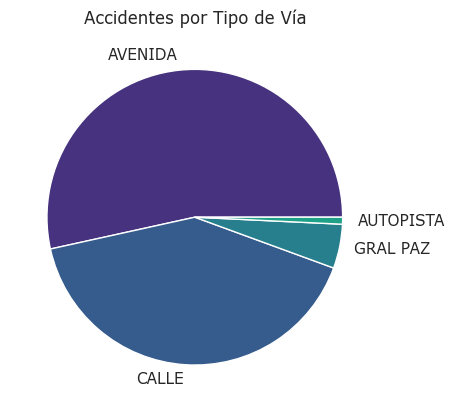

In [65]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid",palette='viridis',font="Verdana",font_scale=1)
fig, ax = plt.subplots()
ax.pie(tipo_via, labels=tipo_via.index)
plt.title('Accidentes por Tipo de Vía')
plt.show()

mas calles que avenidas, por lo tanto chocas más en avenidas

#### Comuna

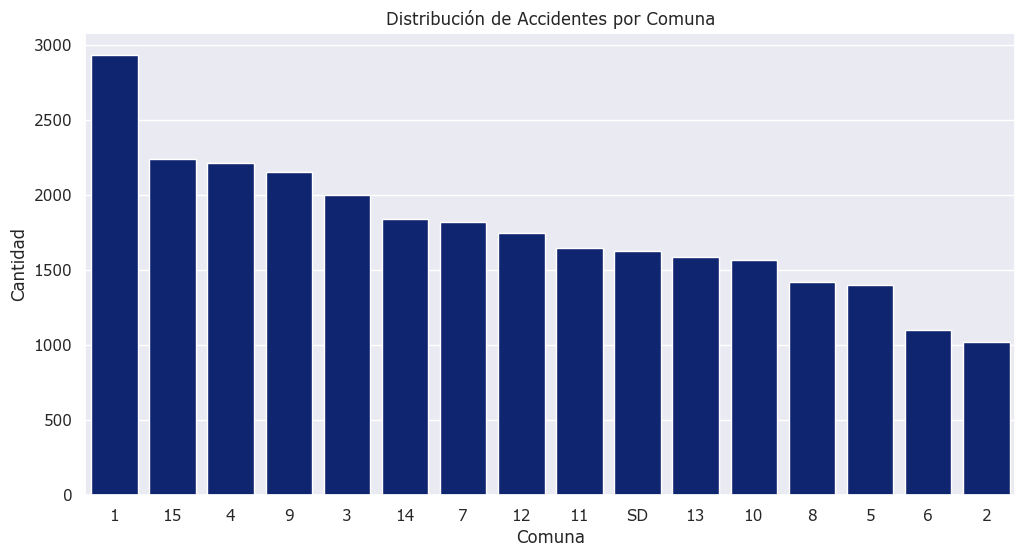

In [38]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid",palette='dark',font="Verdana",font_scale=1)
sns.barplot(x=df_accidentes["comuna"].value_counts().index, y=df_accidentes["comuna"].value_counts())
plt.title('Distribución de Accidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel("Cantidad")
plt.show()

La distribución por comuna es bastante homogenea. Se observa un valor particularmente alto en la comuna uno y valores un poco bajos en las comunas 6 y 2. Voy a revisar si hay relación lógica entre el tamaño de la comuna y la cantidad de accidentes, o se trata de causas que requieren un análisis más profundo.

### Análisis de las variables en conjunto: